# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

<span style="color: blue;">
    
Note: For readability, my commentary in markdown cells will be in blue text.

</span>

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# Note: For this final project, students had an option to choose from four data sets. I commented out the datasets I didn't choose.

# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
# airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
# WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
# bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df1 = pd.read_csv(adultDataSet_filename, header=0)
# df2 = pd.read_csv(airbnbDataSet_filename, header=0)
# df3 = pd.read_csv(WHRDataSet_filename, header=0)
# df4 = pd.read_csv(bookReviewDataSet_filename, header=0)

<span style="color: blue;"> The below code cells were used for me to familarize myself with each dataset, which involved me going back to previous assignments involving these datasets to observe the types of business problems I can pose and solve with the data, as well as potential options for machine learning models. This can be considered to be the fundamental "business understanding" step of the machine learning (ML) life cycle. </span>

<span style="color: blue;">
<b>Option 1</b>:   
The "census" data set that contains Census information from 1994

`censusData.csv` 
</span>

In [3]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


<span style="color: blue;">
<b>Option 2</b>:
Airbnb NYC "listings" data set

`airbnbListingsData.csv`
</span>

In [4]:
# df2.head()

<span style="color: blue;">
<b>Option 3</b>:
World Happiness Report (WHR) data set

`WHR2018Chapter2OnlineData.csv`
</span>

In [5]:
# df3.head()

<span style="color: blue;">
<b>Option 3</b>:
Book Review data set: 
    
`bookReviewsData.csv`

</span>

In [6]:
# df4.head()

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classification or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<b>1. List the data set you have chosen.</b>

<span style="color: blue;">I have chosen the "census" data set that contains Census information from 1994, also known as the Adult dataset: `censusData.csv`.<span>

In [7]:
df = df1

<b>2. What will you be predicting? What is the label?</b>

<span style="color: blue;">

I will be conducting the dataset's intended prediction task of determinining whether a person's income is over $50,000 a year. The column that reflects this is<span/> `income_binary`, so we will use that column as our label represented by the dataframe `y` moving forward.

</span>

In [8]:
y = df['income_binary']

<b>3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classification or multi-class classifiction problem?</b>
    

<span style="color: blue;">This is a supervised learning problem because we determined our label to `income_binary`, and we will use labeled examples as inputs to train models. Furthermore, it is a classification problem because the label is discrete/categorical. Even though the column `income_binary` refers to an individual's income, it specifically refers to whether the individual is making greater or less than \\$50,000 a year. Therefore, the problem is specifically a binary classification problem where there are only two possible label values: [0] the individual makes less than or equal to \\$50,000 a year (`<=50K`) or [1] the individual makes greater than \\$50,000 a year (`>50K`)</span>.

In [9]:
df['income_binary'].unique()

array(['<=50K', '>50K'], dtype=object)

<b>4. What are your features? (note: this list may change after your explore your data)</b>

<span style="color: blue;"> The dataset's current features are below, represented by the dataframe `X`. I initially observe some demographic features that could be of use in predicting an individual's income, such as `age`, `workclass`, `education`, etc.<span>

In [10]:
X = df.drop(['income_binary'], axis=1)
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

<span style="color: blue;"> Upon performing exploratory data analysis (EDA) and data preparation, I plan to reduce the amount of features as suggested by the question. The following lines explain what each feature means, which will be useful in determining which features are useful for predicting an individual's income. <span>

<span style="color: blue;">`age`: The age of the individual.<span>

In [11]:
df['age'].dtype

dtype('float64')

<span style="color: blue;">`workclass`: The working class of the individual.

In [12]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

<span style="color: blue;">`fnlwgt`: The final weight, which is the number of units in the target population that the individual represents. In simpler terms, it is the number of individuals in the population with the same demographics as this individual. <span>

In [13]:
df['fnlwgt'].dtype

dtype('int64')

<span style="color: blue;">`education`: The level of education of the individual. <span>

In [14]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

<span style="color: blue;">`education-num`: The number of years of education of the individual. <span>

In [15]:
df['education-num'].dtype

dtype('int64')

<span style="color: blue;">`marital-status`: The marital status of the individual. <span>

In [16]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

<span style="color: blue;">`occupation`: The occupation of the individual.<span>

In [17]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

<span style="color: blue;">`relationship`: The relationship status of the individual.<span>

In [18]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

<span style="color: blue;">`race`: The race of the individual.<span>

In [19]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Inuit',
       'Other'], dtype=object)

<span style="color: blue;">`sex_selfID`: The sex of the individual.<span>

In [20]:
df['sex_selfID'].unique()

array(['Non-Female', 'Female'], dtype=object)

<span style="color: blue;">`capital-gain`: The capital gain of the individual. This refers to the profit an individual makes from selling an asset. <span>

In [21]:
df['capital-gain'].dtype

dtype('int64')

<span style="color: blue;">`capital-loss`: The capital loss of the individual. This refers to the profit an individual loses from selling an asset.<span>

In [22]:
df['capital-loss'].dtype

dtype('int64')

<span style="color: blue;">`hours-per-week`: The number of hours per week worked by the individual.<span>

In [23]:
df['hours-per-week'].dtype

dtype('float64')

<span style="color: blue;">`native-country`: The native country of the individual.<span>

In [24]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

<b>5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?</b>
    
<span style="color: blue;"> Training a machine learning model that predicts whether a person's income is over or under a specific threshold offers a variety of use cases for companies across different sectors, with one of the more prominent being the financial sector. <span> 

<span style="color: blue;"> Financial institutions can utilize this model to determine the creditworthiness of individuals, which is defined as the extent to which a person or company is considered suitable to receive financial credit. A person's income is a strong indicator of an individual’s ability to repay borrowed money. In a case where income data is not available, the financial institution can set an appropriate credit limit using further understanding of the individual's demographics beyond just considering their reliability in paying money back in the past. <span>

<span style="color: blue;"> Furthermore, another use of this model could be for companies that offer financial planning services, or independent contractors in financial advising. In a case where income data is not available, this model can be used to help make informed decisions about how to make decisions regarding their savings, investments, and retirement based on demographics. <span>

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<span style="color:blue">

First, I will inspect the data using the following:

- `df.shape` to view the number of rows and columns the data has.  
- `df.head()` and `df.tail()` to view the first and last few rows of the data.  
- `df.dtypes` to inspect the data type of each column.  
- `df.describe()` to get insight into key statistics for numerical columns.
- Plotting histograms of numeric features and lineplots for confounding features

</span>

In [25]:
# Display the shape of df -- that is, the number of rows and columns.
df.shape

(32561, 15)

In [26]:
# Display the first few rows of the dataframe
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [27]:
# Display the last few rows of the dataframe
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
32556,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
32557,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Non-Female,0,0,40.0,United-States,>50K
32558,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
32559,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Non-Female,0,0,20.0,United-States,<=50K
32560,52.0,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,14084,0,40.0,United-States,>50K


In [28]:
# Display the data types of all columns
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [29]:
# Display descriptive statistics
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


<span style="color:blue">
    
Now, I will define two dataframes, `num_cols` for numerical features and `cat_cols` for categorical features. These dataframes will be used later during data preparation. I also manually encoded the label `income_binary` due to the fact that one-hot encoding will create two unique columns for each of the label's binary states when I only want one column to represent the label. I defined the label's possible binary states as: [1] the individual makes greater than \\$50,000 a year (`>50K`) and [0] the individual makes less than or equal to \\$50,000 a year (`<=50K`).

<span>

In [30]:
# Manually encode label
df['income_binary'] = df['income_binary'].apply(lambda x: 1 if x == '>50K' else 0)

# Re-define label
y = df['income_binary']

# Define two dataframes: for numerical features and categorical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

<span style="color:blue">
    
I will plot each numerical feature using a histogram to visualize if outliers are present and what strategies we may need to utilize to further handle them.

<span>

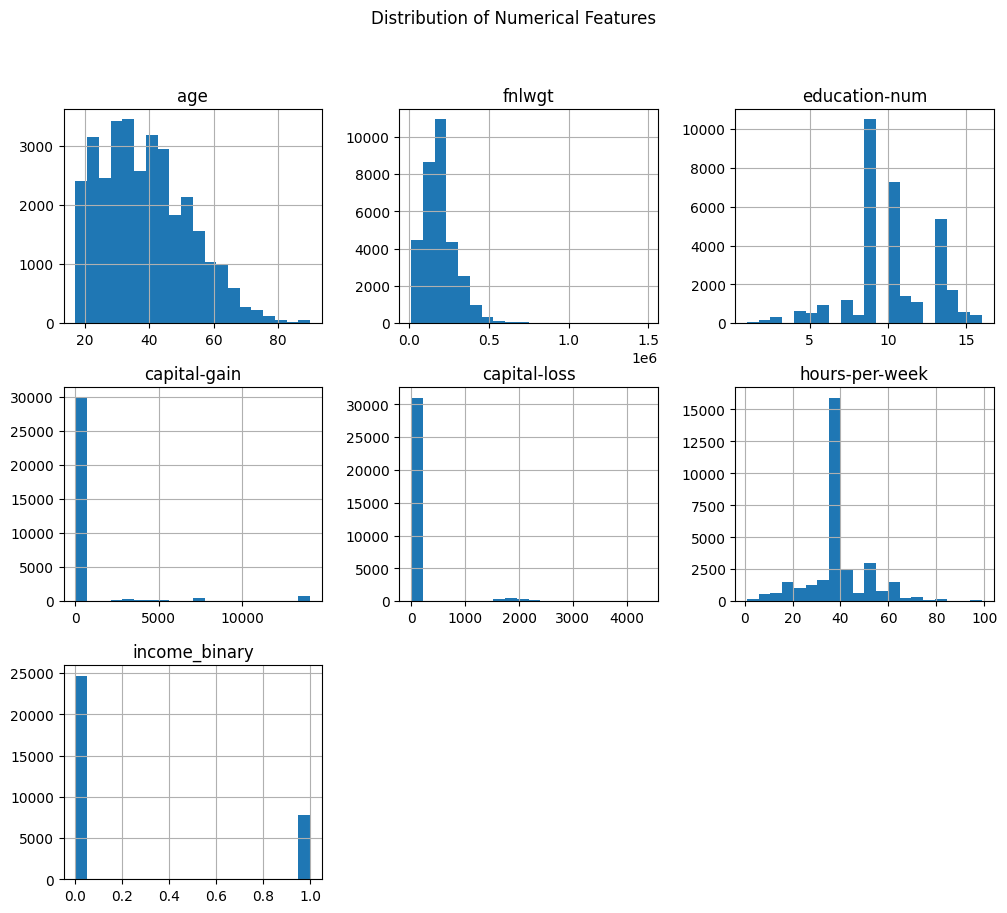

In [31]:
# Histograms for numerical features to visualize distribution
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.

<b>1. Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data?</b>

<span style="color:blue">

After merely inspecting the data, I do not have a new feature list. However I expect to remove features later during data preparation when I perform feature engineering and heuristic feature selection.

</span>


<b>2. Explain different data preparation techniques that you will use to prepare your data for modeling.</b>

<span style="color:blue">
    
First, we will clean the data. 
- To address outliers, I will perform winsorization from both tails of its distribution at the 1st and 99th percentiles, where we will clamp outlier data points at specific values derived from the data itself.
- To address null values, I will perform imputation, where we impute null values from numeric features with the median value of that feature, and null values of categorical features with the mode of that feature.

Next, we will perform feature engineering and heuristic feature selection.
- To narrow down my numeric features, I will perform heuristic feature selection where we will only consider features that have a sufficient correlation, as well as considering confounding features that may have high correlations with each other.
- To make sure numeric features do not have disproportionate predictive power, we will perform standardization, where we transform the values of a feature to have a mean of 0 and a standard deviation of 1.
- To make categorical features more interpretable, we will one-hot encode them into unique binary features for each of its possible values.

Finally, we will address class imbalance in my dataset to promote fair AI representation.
- Class imbalance is defined as a problem in machine learning where the total number of a class of positive data is far less than the total number of another class of negative data.
- Since we have a dataset with a fairly large number of examples, we will downsample the class with the majority of examples.

</span>

<b>3. What is your model (or models)?</b>

<span style="color:blue">
I plan to train, validate, and test three models with three different ML algorithms to follow agile model development, which starts with a simple modeling approach and improves by cycling through more complex modeling designs. I will use Logistic Regression (LR), Decision Trees (DT), and Random Forest (RF) algorithms. I will use Logistic Regression because the algorithm yields simpler, interpretable results, and it provides probabilities for each class. I will use Decision Trees because they allow us to observe how decisions are made based on different features. To generalize even further from these two models, I will use Random Forest, which is a bootstrap aggregating algorithm that involves an ensemble of deep decision trees to improve accuracy and achieve the optimal balance of low bias and low variance.
    
</span>


<b>4. Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.</b>

<span style="color:blue">
    
First, I will use `train_test_split` method from the `sklearn.model_selection` module to split the data. Next, I will create initial models for the three ML algorithms using default parameters to find a baseline comparison, and fit them on the training data sets. Then, I will use the `predict()` method to use the fitted model to predict the class labels for the test set and the `predict_proba()` method to use the fitted model to predict class probabilities for the test set.

To analyze performance of individual models, I will use various metrics and methods to display them:
- Accuracy Score
- ROC-AUC Score
- `classification_report` from `sklearn.metrics` to display the main classification metrics of Accuracy, Precision, Recall.
- Confusion Matrix to display True/False Positives & Negatives

To compare performance between models, I will compare these metrics. I will also compute the Receiver Operating Characteristics (ROC) curve for each model and plot the curves on one lineplot, as well as compute the Area Under the [ROC] Curve (AUC) score and compare this metric among the three models.

Next, I will conduct validation of my data. I choose not to use stepwise feature selection or regularization for for feature selection because I already intend to perform heuristic feature selection prior to model training. I will perform hyperparameter optimization through `GridSearchCV()` using k-fold cross-validation where `k=5` to emphasize out-of-sample validation. K-fold cross-validation involves performing the holdout method (train and validation) k times, such that each time, it trains on k - 1 training folds and test on one validation fold. In this way, every fold will have a chance to serve as a validation set. It then then averages the resulting prediction accuracies obtained on each of the k iterations to get a good estimate of our model’s performance on new data.

Finally, I will analyze the performance of individual models and compare the models now that hyperparameters have been optimized using the same procedure as my initial models.

</span>

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [32]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from scipy.stats.mstats import winsorize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

<h3 style="color: blue;">Step 1. Prepare your data for your model.</h3>

<h4 style="color: blue;">Step 1a. Handle Outliers</h4>

<span style="color:blue">
An outlier is a data point that differs significantly from other observations. This could be due to error (like putting a decimal in the wrong spot) or a true pattern that needs further investigation.  In either event, they need to be handled as necessary. Before, I plotted each numerical feature using a histogram to visualize if outliers are present and what strategies we may need to utilize to further handle them. Now, I will display the descriptive statistics of each numerical feature, and specifically focus on each feature's `min` and `max` values to ascertain the presence of outliers.

<span>

In [33]:
# Display descriptive statistics
df[num_cols].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000,32561.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428,0.240810
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000,1.000000


<span style="color:blue">

From visualizing the data, we see that the `capital_gain` and `capital_loss` features appeared to be skewed to the right, with most values concentrated at 0 and some outliers significantly greater than 0. To address outliers, we will perform winsorization. Winsorization is the method of clamping outlier data points at specific values derived from the data itself, like a percentile. Data can be winsorized from both tails of its distribution by choosing a lower/upper percentile and capping points at those percentiles. I will winsorize the data at the 1st and 99th percentiles.

<span>

In [34]:
# Winsorize at 1% and 99%
for col in num_cols:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

In [35]:
# Display descriptive statistics after winsorization
df[num_cols].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.759252,188564.258868,10.088971,615.907773,83.800068,41.067351,0.240810
std,13.811036,99738.071380,2.547541,2420.191974,382.955091,13.515656,0.427581
min,17.000000,27184.000000,3.000000,0.000000,0.000000,8.000000,0.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,78.000000,510072.000000,16.000000,14084.000000,1980.000000,99.000000,1.000000


<span style="color:blue">

After performing winsorization, we can see that the descriptive statistics for `fnlwgt` drastically changed, and the maximum of `capital-loss` has decreased.

<span>

<h4 style="color: blue;">Step 1b. Handle Missing Data</h4>

<span style="color:blue">

Having missing values can occur for multiple reasons, such as:
- System failures or timeouts when logging data.
- Illegal values being passed into a formatted data field.
- Actual missing-ness, such as from incomplete surveying.
  
Let's address these missing values by first determining which columns they fall under.

<span>

In [36]:
# Check for missing values
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income_binary        0
dtype: int64


<span style="color: blue;"> 

We will address these values through imputation. We will impute numerical columns with the median, as it is a non-resistant measure of center that will be representable for numerical features whose distributions are either skewed or not skewed. We will impute categorical columns with mode to make sure that the categorical data we impute is most representable of the majority of examples. 

<span>

In [37]:
# Impute missing values for numerical columns with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Impute missing values for categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/c9/wn2xf92x7p91gfpzb9dzjm2c0000gn/T/ipykernel_34772/3080643177.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [38]:
# Check for missing values after imputation
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64


<span style="color: blue;"> 

After imputation, we see that there are no missing values left in the dataset.

<span>

<h4 style="color: blue;">Step 1c. Feature Engineering/Selection</h4>

<span style="color: blue;"> 

Now, we will perform feature engineering and selection. During feature engineering, we are focused on mapping the appropriate predictive or causal concepts into a data representation and then transforming it into a format that can be easily consumed by an intended machine learning model. I am choosing to also perform preliminary heuristic feature selection during the data preparation phase using correlation with the label and other features.

<span>

<h4 style="color: blue;">Preliminary Numerical Feature Selection</h4>

<span style="color: blue;"> 

I will perform one-hot encoding to transform categorical features into unique numerical features with binary values. I firstwant to analyze the current numeric features and perform heuristic feature selection because one-hot encoding will create a large amount of numerical features, making it harder to analyze purely numeric data. If I notice a feature with a significantly low correlation with the label, I will drop it from the dataset since it will not prove to be useful in predicting income class.

<span>

In [39]:
df[num_cols].corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary
age,1.000000,-0.077728,0.037882,0.121408,0.050848,0.063092,0.229312
fnlwgt,-0.077728,1.000000,-0.043355,-0.002197,-0.008487,-0.019441,-0.009246
education-num,0.037882,-0.043355,1.000000,0.168202,0.081069,0.131260,0.336803
capital-gain,0.121408,-0.002197,0.168202,1.000000,-0.055690,0.093839,0.347555
capital-loss,0.050848,-0.008487,0.081069,-0.055690,1.000000,0.048217,0.151407
hours-per-week,0.063092,-0.019441,0.131260,0.093839,0.048217,1.000000,0.206296
income_binary,0.229312,-0.009246,0.336803,0.347555,0.151407,0.206296,1.000000


In [40]:
corrs = df[num_cols].corr()['income_binary'].drop('income_binary', axis = 0)
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

capital-gain      0.347555
education-num     0.336803
age               0.229312
hours-per-week    0.206296
capital-loss      0.151407
fnlwgt           -0.009246
Name: income_binary, dtype: float64

<span style="color: blue;"> 

Since the `fnlwgt` has a significantly low correlation with the label at approximately -0.009, I will drop this feature.

<span>

In [41]:
df = df.drop('fnlwgt', axis=1)

<h4 style="color: blue;">Feature Transformation: One-Hot Encoding of Categorical Features</h4>

<span style="color: blue;"> 

Prior to being consumed by a machine learning model, I will perform one-hot encoding of my categorical features. The process of one-hot encoding involves converting K categories into an array of K binary values.

<span>

In [42]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income_binary,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,13,2174,0,40.0,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50.0,13,0,0,13.0,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38.0,9,0,0,40.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53.0,7,0,0,40.0,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28.0,13,0,0,40.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df.shape

(32561, 97)

<h4 style="color: blue;">Feature Transformation: Standard Scaling of Numerical Features</h4>

<span style="color: blue;"> 

Now, we scale our numerical features to ensure that all features contribute equally to the model's learning and training phases, preventing features with larger value ranges from disproportionately impacting the model's outcome

We will perform standardization, which is implemented through `StandardScaler()`. In the standard scaler approach, we transform the values of a feature to have a mean of 0 and a standard deviation of 1.

<span>

In [44]:
# Select relevant features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
X_prescaled = df[num_cols].drop(['income_binary'], axis=1)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_prescaled)

# Redefine our current features
X = X_scaled

<h4 style="color: blue;">Categorical Feature Selection</h4>

<span style="color: blue;"> 

After one-hot encoding, the number of features has significantly increased. Now, I plan to reduce the subset of features I will use for training through heuristic feature selection once again.

<span>

In [45]:
corrs = df.corr()['income_binary'].drop('income_binary', axis = 0)
corrs_sorted = corrs.sort_values(ascending=False)
print(corrs_sorted[corrs_sorted.between(-0.02, 0.02)])

native-country_Iran                          0.015121
native-country_Japan                         0.014944
workclass_State-gov                          0.014843
native-country_Taiwan                        0.014020
native-country_Philippines                   0.012306
native-country_Germany                       0.012216
native-country_France                        0.012079
marital-status_Married-AF-spouse             0.012061
native-country_Canada                        0.011642
native-country_England                       0.011392
native-country_Italy                         0.011270
race_Asian-Pac-Islander                      0.010543
education_Assoc-voc                          0.010048
native-country_Yugoslavia                    0.006959
native-country_Hong                          0.003432
education_Assoc-acdm                         0.003250
native-country_China                         0.002906
native-country_Cuba                          0.002827
native-country_Greece       

In [46]:
df.drop(list(df.filter(regex='native-country')), axis=1, inplace=True)

<span style="color: blue;">I notice that there are two features related to an individual's level of education: `education-num` and previously `education-level`, which has now been one-hot encoded into features respective to each educational level. Let's explore these features: </span>

In [47]:
print(corrs_sorted[corrs_sorted.index.str.contains('education')])

education-num             0.336803
education_Bachelors       0.180485
education_Masters         0.174570
education_Prof-school     0.154907
education_Doctorate       0.132572
education_Assoc-voc       0.010048
education_Assoc-acdm      0.003250
education_Preschool      -0.022307
education_1st-4th        -0.034544
education_12th           -0.044690
education_5th-6th        -0.045826
education_9th            -0.055767
education_7th-8th        -0.059524
education_Some-college   -0.063535
education_11th           -0.085864
education_HS-grad        -0.131189
Name: income_binary, dtype: float64


<span style="color: blue;">
    
Since `education-num` has a significantly higher correlation than the features associated with `education-level`, I will drop these associated features due to confounding.

</span>

In [48]:
edu_cols = [col for col in df.columns if 'education' in col]
edu_cols = [col for col in edu_cols if col != 'education-num']
df = df.drop(columns=edu_cols)

In [49]:
df.shape

(32561, 42)

<span style="color: blue;">

After heuristic feature selection, the number of features has been halved.

</span>

<h4 style="color: blue;">Step 1d. Addressing Class Imbalance</h4>

<span style="color: blue;">

Class imbalance is defined as a problem in machine learning where the total number of a class of positive data is far less than the total number of another class of negative data.

</span>

In [50]:
df['income_binary'].value_counts()

income_binary
0    24720
1     7841
Name: count, dtype: int64

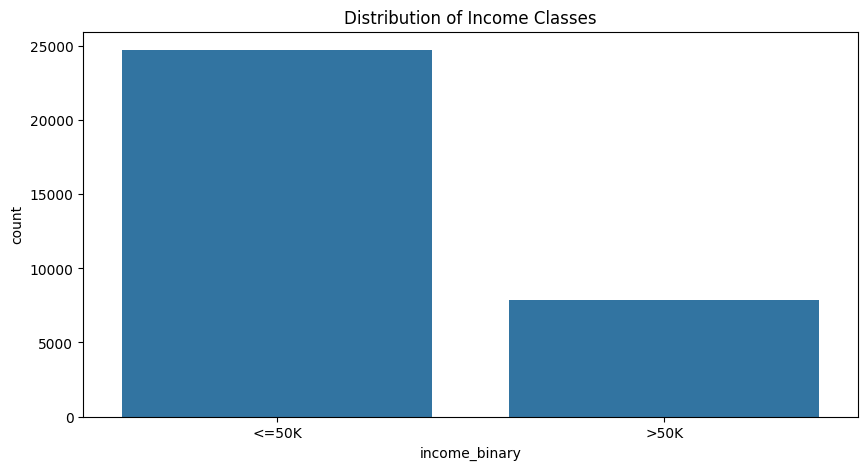

In [51]:
# Visualize the class distribution for income_binary
plt.figure(figsize = (10, 5))
sns.countplot(x = df['income_binary'])
plt.title('Distribution of Income Classes')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()

<span style="color: blue;">

From visualizing the data, I see that the label [0] the individual makes less than or equal to \\$50,000 a year (`<=50K`) has far more examples than [1] the individual makes greater than \\$50,000 a year (`>50K`). Since I have a dataset with a fairly large number of examples, I will downsample the class with the majority of examples.

</span>

In [52]:
# Separate the majority and minority classes
df_majority = df[df['income_binary'] == 0]
df_minority = df[df['income_binary'] == 1]

# Downsample the majority class
df_majority_downsampled = df_majority.sample(len(df_minority), random_state=1234)

# Combine the minority class with the downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

class_distribution_balanced = df_balanced['income_binary'].value_counts()
print(class_distribution_balanced)

income_binary
0    7841
1    7841
Name: count, dtype: int64


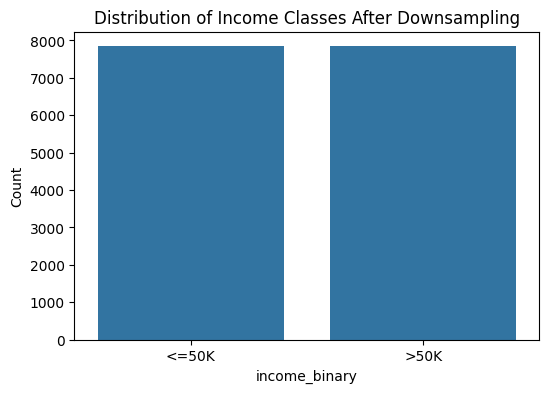

In [53]:
# Visualize the class distribution for income_binary after downsampling
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution_balanced.index, y=class_distribution_balanced.values)
plt.title('Distribution of Income Classes After Downsampling')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.ylabel('Count')
plt.show()

<span style="color: blue;">

After downsampling, we see that binary state [0] now has an equal amount of examples to binary state [1].

</span>

<h4 style="color: blue;">Training Phase</h4>

In [54]:
# Train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [55]:
# Inspect training and test datasets
data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}
for name, dataset in data.items():
    print(f'{name} dimensions: {dataset.shape}')

X_train dimensions: (26048, 5)
X_test dimensions: (6513, 5)
y_train dimensions: (26048,)
y_test dimensions: (6513,)


<h3 style="color: blue;">Step 2. Fit your model to the training data and evaluate your model.</h3>

<h4 style="color: blue;">Step 2a. Fit your model to the training data.</h4>

<span style="color: red;">

Note: For readability, I suppressed `ConvergenceWarning` messages during model fitting for Logistic Regression, where the warning occurs when the total number of iterations reaches the limit.

</span>

<span style="color: blue;">

First, I will create three initial models for Logistic Regression, Decision Tree, and Random Forest using default parameters to serve as a baseline prior to model optimization.

</span>

In [56]:
lr_model = LogisticRegression(random_state=123, max_iter=1000)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)
    lr_model.fit(X_train, y_train)

In [57]:
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h4 style="color: blue;">Step 2b. Evaluate your models.</h4>

In [59]:
# Use the predict() method to use the fitted model to predict the class labels for the test set.
y_pred_lr = lr_model.predict(X_test)

# Use the predict_proba() method  to use the fitted model to predict class probabilities for the test set.
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

In [60]:
# Display Initial LR Model Metrics
print("Initial LR Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Inital LR ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_lr))
print("Initial LR Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
c_m = confusion_matrix(y_test, y_pred_lr, labels=[1, 0])
confusion_df = pd.DataFrame(
    c_m,
    columns=['Predicted: >50K', 'Predicted: <=50K'],
    index=['Actual: >50K', 'Actual: <=50K']
)
confusion_df

Initial LR Accuracy: 0.8142177184093352
Inital LR ROC-AUC Score: 0.8303038357497393
Initial LR Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4927
           1       0.72      0.38      0.50      1586

    accuracy                           0.81      6513
   macro avg       0.78      0.67      0.69      6513
weighted avg       0.80      0.81      0.79      6513



,Predicted: >50K,Predicted: <=50K
Actual: >50K,608,978
Actual: <=50K,232,4695


In [61]:
# Use the predict() method to use the fitted model to predict the class labels for the test set.
y_pred_dt = dt_model.predict(X_test)

# Use the predict_proba() method  to use the fitted model to predict class probabilities for the test set.
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

In [62]:
# Display Initial DT Model Metrics
print("Initial DT Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Initial DT ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_dt))
print("\nInitial DT Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
c_m = confusion_matrix(y_test, y_pred_dt, labels=[1, 0])
confusion_df = pd.DataFrame(
    c_m,
    columns=['Predicted: >50K', 'Predicted: <=50K'],
    index=['Actual: >50K', 'Actual: <=50K']
)
confusion_df

Initial DT Accuracy: 0.8162137263933671
Initial DT ROC-AUC Score: 0.784666342983345

Initial DT Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      4927
           1       0.68      0.47      0.55      1586

    accuracy                           0.82      6513
   macro avg       0.76      0.70      0.72      6513
weighted avg       0.80      0.82      0.80      6513



,Predicted: >50K,Predicted: <=50K
Actual: >50K,742,844
Actual: <=50K,353,4574


In [63]:
# Use the predict() method to use the fitted model to predict the class labels for the test set.
y_pred_rf = rf_model.predict(X_test)

# Use the predict_proba() method  to use the fitted model to predict class probabilities for the test set.
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [64]:
# Display Initial RF Model Metrics
print("Initial RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Initial RF ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))
print("\nInitial RF Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
c_m = confusion_matrix(y_test, y_pred_rf, labels=[1, 0])
confusion_df = pd.DataFrame(
    c_m,
    columns=['Predicted: >50K', 'Predicted: <=50K'],
    index=['Actual: >50K', 'Actual: <=50K']
)
confusion_df

Initial RF Accuracy: 0.8217411331183786
Initial RF ROC-AUC Score: 0.8334075356446233

Initial RF Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      4927
           1       0.69      0.49      0.57      1586

    accuracy                           0.82      6513
   macro avg       0.77      0.71      0.73      6513
weighted avg       0.81      0.82      0.81      6513



,Predicted: >50K,Predicted: <=50K
Actual: >50K,770,816
Actual: <=50K,345,4582


<h4 style="color: blue;">Step 2c. Initial Model Comparison</h4>

In [65]:
# Compute ROC curve for initial models.
print('Computing ROC Curve...')

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


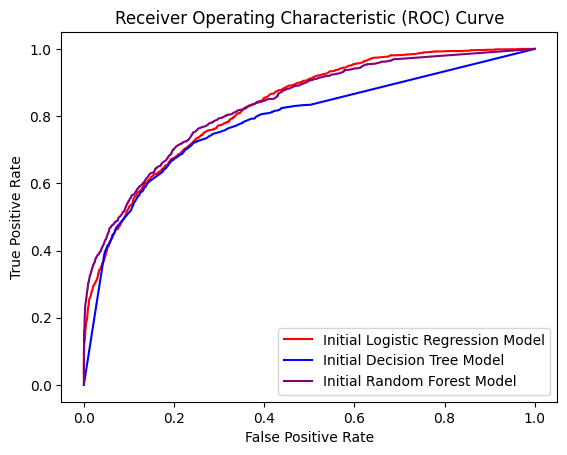

In [66]:
# Plot ROC curve for initial models.
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_lr, y=tpr_lr, color='red', label='Initial Logistic Regression Model')
sns.lineplot(x=fpr_dt, y=tpr_dt, color='blue', label='Initial Decision Tree Model')
sns.lineplot(x=fpr_rf, y=tpr_rf, color='purple', label='Initial Random Forest Model')

plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [67]:
# Compute AUC scores for initial models.

auc_lr = auc(fpr_lr, tpr_lr)
print("AUC of the Initial LR model: {:.3f}".format(auc_lr))

auc_dt = auc(fpr_dt, tpr_dt)
print("AUC of the Initial DT model: {:.3f}".format(auc_dt))

auc_rf = auc(fpr_rf, tpr_rf)
print("AUC of the Initial RF model: {:.3f}".format(auc_rf))

AUC of the Initial LR model: 0.830
AUC of the Initial DT model: 0.785
AUC of the Initial RF model: 0.833


<span style="color: blue;">
    
When choosing from accuracy, precision, or recall as a classification metric, precision seems to be the most appropriate with respect to the context of my business problem. Precision is considered when the cost of predicting a false positive is high, and I believe this to be the case when a financial institution wants to predict the income class of an individual for their creditworthiness. If the model predicts an individual to make over \\$50,000 a year when they actually make less or equal to \\$50,000, the financial institution may make misinformed decisions on the individual's creditworthiness, which will end up being more costly. However, I will still compare other metrics such as accuracy and ROC-AUC score to form a more nuanced explanation.

The LR model yields the greatest precision at 0.78, with the RF model falling short at a precision of 0.77, and the DT model having the least precision at about 0.76. This means that the LR model has the highest ratio of true predictions of an individual's income being greater than \\$50,000, to the total amount of individuals predicted to have an income of over \$50,000. The LR model has an accuracy of about 0.814, the DT model has an accuracy of about 0.816, and the RF model has an accuracy of about 0.82. This means that the models are very close to each other in having the highest ratio of correct predictions to the total amount of predictions. Furthermore, the LR and RF models have equal ROC-AUC scores at about 0.83, with the DT model having an ROC-AUC score of about 0.79. This means that the LR and RF models have a 83% chance of correctly ranking a randomly chosen individual making greater than \\$50,000 higher than a randomly chosen individual making less or equal to \\$50,000. When taking these metrics into account, the LR and RF models are close in performance with the DT model falling short. 

</span>

<h3 style="color: blue;">Step 3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.</h3>

<h4 style="color: blue;">Logistic Regression (LR) Model</h4>

In [68]:
# Create the parameter grid for grid search.
param_grid_lr = {'C' : [10**i for i in range(-10,10)],
                 'penalty': ['l1', 'l2'],
                 'solver': ['liblinear']}

In [69]:
# Perform grid search.
print('Running Grid Search...')

# 1. Create a LogisticRegression model object with the argument max_iter=1000. Save the model object to the variable 'model'
model = LogisticRegression(max_iter=1000)

# 2. Run a grid search with 5-fold cross-validation and assign the output to the object 'grid'.
grid = GridSearchCV(model, param_grid_lr, cv=5)

# 3. Fit the model on the training data and assign the fitted model to the variable 'grid_search'
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)
    grid_search_lr = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [70]:
# Use the best_estimator_() method to retrieve the best-performing model determined by GridSearchCV()
best_lr_model = grid_search_lr.best_estimator_

# Use the predict() method to use the fitted model to predict the class labels for the test set.
y_pred_best_lr = best_lr_model.predict(X_test)

# Use the predict_proba() method to use the fitted model to predict class probabilities for the test set.
y_pred_best_lr_proba = best_lr_model.predict_proba(X_test)[:, 1]

In [71]:
# Display Optimal LR Model Hyperparameters and Metrics
print('Optimal LR hyperparameters: {0}'.format(grid_search_lr.best_params_))
print("Optimal LR Accuracy:", grid_search_lr.best_score_)
print("Optimal LR ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_lr_proba))
print("\nOptimal LR Classification Report:\n", classification_report(y_test, y_pred_best_lr))

print("Optimal LR Confusion Matrix:\n")
c_m = confusion_matrix(y_test, y_pred_best_lr, labels=[1, 0])
confusion_df = pd.DataFrame(
    c_m,
    columns=['Predicted: >50K', 'Predicted: <=50K'],
    index=['Actual: >50K', 'Actual: <=50K']
)
confusion_df

Optimal LR hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Optimal LR Accuracy: 0.8132293177797617
Optimal LR ROC-AUC Score: 0.8300170509616953

Optimal LR Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4927
           1       0.73      0.37      0.49      1586

    accuracy                           0.81      6513
   macro avg       0.78      0.66      0.69      6513
weighted avg       0.80      0.81      0.79      6513

Optimal LR Confusion Matrix:



,Predicted: >50K,Predicted: <=50K
Actual: >50K,587,999
Actual: <=50K,212,4715


<h4 style="color: blue;">Decision Tree (DT) Model</h4>

In [72]:
# Create the parameter grid for grid search.
param_grid_dt = {
    'max_depth': [2**n for n in range(2,5)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2**n for n in range(0,3)]
}

In [73]:
# Perform grid search.
print('Running Grid Search...')

# 1. Create a DecisionTreeClassifier model object without supplying arguemnts
model = DecisionTreeClassifier()

# 2. Run a Grid Search with 5-fold cross-validation using the model. Pass all relevant parameters to GridSearchCV and assign the output to the object 'grid'
grid = GridSearchCV(model, param_grid_dt, cv=5)

# 3. Fit the model on the training data and assign the fitted model to the variable grid_search.
grid_search_dt = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [74]:
# Use the best_estimator_() method to retrieve the best-performing model determined by GridSearchCV()
best_dt_model = grid_search_dt.best_estimator_

# Use the predict() method to use the fitted model to predict the class labels for the test set.
y_pred_best_dt = best_dt_model.predict(X_test)

# Use the predict_proba() method to use the fitted model to predict class probabilities for the test set.
y_pred_best_dt_proba = best_dt_model.predict_proba(X_test)[:, 1]

In [75]:
# Display Optimal DT Model Hyperparameters and Metrics
print('Optimal DT hyperparameters: {0}'.format(grid_search_lr.best_params_))
print("Optimal DT Accuracy:", grid_search_dt.best_score_)
print("Optimal DT ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_dt_proba))
print("\nOptimal DT Classification Report:\n", classification_report(y_test, y_pred_best_dt))

print("Optimal DT Confusion Matrix:\n")
c_m = confusion_matrix(y_test, y_pred_best_dt, labels=[1, 0])
confusion_df = pd.DataFrame(
    c_m,
    columns=['Predicted: >50K', 'Predicted: <=50K'],
    index=['Actual: >50K', 'Actual: <=50K']
)
confusion_df

Optimal DT hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Optimal DT Accuracy: 0.8329617976269479
Optimal DT ROC-AUC Score: 0.8591725446244041

Optimal DT Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      4927
           1       0.80      0.44      0.57      1586

    accuracy                           0.84      6513
   macro avg       0.82      0.70      0.73      6513
weighted avg       0.83      0.84      0.82      6513

Optimal DT Confusion Matrix:



,Predicted: >50K,Predicted: <=50K
Actual: >50K,695,891
Actual: <=50K,174,4753


<h4 style="color: blue;">Random Forest (RF) Model</h4>

In [76]:
# Create the parameter grid for grid search.
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

<span style="color: blue;">
 
 I have tried using `GridSearchCV()` with my RF model but it ended up being computationally expensive. So, I will use `RandomizedSearchCV()` instead.

</span>

In [77]:
# Perform grid search.
print('Running Random Search...')

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier()

# Initialize RandomizedSearchCV()
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=20,  
    cv=3,       
    scoring='roc_auc',
    random_state=123,
    n_jobs=-1   
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

print('Done')

Running Random Search...
Done


In [78]:
# Use the best_estimator_() method to retrieve the best-performing model determined by GridSearchCV()
best_rf_model = random_search_rf.best_estimator_

# Use the predict() method to use the fitted model to predict the class labels for the test set.
y_pred_best_rf = best_rf_model.predict(X_test)

# Use the predict_proba() method to use the fitted model to predict class probabilities for the test set.
y_pred_best_rf_proba = best_rf_model.predict_proba(X_test)[:, 1]

In [79]:
# Display Optimal RF Model Hyperparameters and Metrics
print("Optimal RF Hyperparameters:", random_search_rf.best_params_)
print("Optimal RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Optimal RF ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_rf_proba))
print("\nOptimal RF Classification Report:\n", classification_report(y_test, y_pred_best_rf))

print("Optimal RF Confusion Matrix:\n")
c_m = confusion_matrix(y_test, y_pred_best_rf, labels=[1, 0])
confusion_df = pd.DataFrame(
    c_m,
    columns=['Predicted: >50K', 'Predicted: <=50K'],
    index=['Actual: >50K', 'Actual: <=50K']
)
confusion_df

Optimal RF Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Optimal RF Accuracy: 0.8217411331183786
Optimal RF ROC-AUC Score: 0.8685662501014176

Optimal RF Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      4927
           1       0.80      0.44      0.57      1586

    accuracy                           0.84      6513
   macro avg       0.82      0.70      0.73      6513
weighted avg       0.83      0.84      0.82      6513

Optimal RF Confusion Matrix:



,Predicted: >50K,Predicted: <=50K
Actual: >50K,692,894
Actual: <=50K,171,4756


<h4 style="color: blue;">Optimized Model Comparison</h4>

In [80]:
# Compute ROC curves for optimized models

print('Computing ROC Curve...')

fpr_best_lr, tpr_best_lr, thresholds_best_lr = roc_curve(y_test, y_pred_best_lr_proba)
fpr_best_dt, tpr_best_dt, thresholds_best_dt = roc_curve(y_test, y_pred_best_dt_proba)
fpr_best_rf, tpr_best_rf, thresholds_best_rf = roc_curve(y_test, y_pred_best_rf_proba)

print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


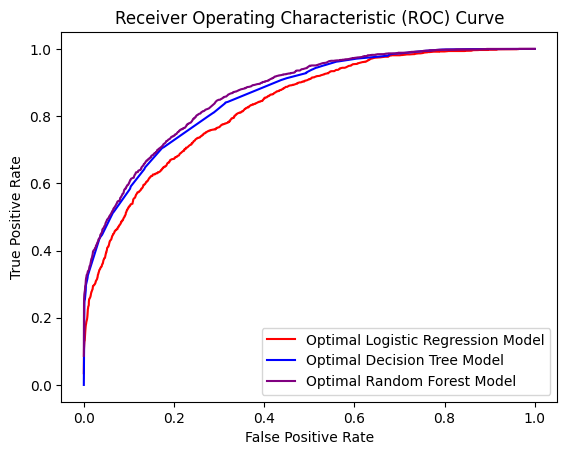

In [81]:
# Plot ROC curves for optimized models

print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_best_lr, y=tpr_best_lr, color='red', label='Optimal Logistic Regression Model')
sns.lineplot(x=fpr_best_dt, y=tpr_best_dt, color='blue', label='Optimal Decision Tree Model')
sns.lineplot(x=fpr_best_rf, y=tpr_best_rf, color='purple', label='Optimal Random Forest Model')

plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [82]:
# Compute AUC scores for optimized models

auc_best_lr = auc(fpr_best_lr, tpr_best_lr)
print("AUC of the Optimal LR model: {:.3f}".format(auc_best_lr))

auc_best_dt = auc(fpr_best_dt, tpr_best_dt)
print("AUC of the Optimal DT model: {:.3f}".format(auc_best_dt))

auc_best_rf = auc(fpr_best_rf, tpr_best_rf)
print("AUC of the Optimal RF model: {:.3f}".format(auc_best_rf))

AUC of the Optimal LR model: 0.830
AUC of the Optimal DT model: 0.859
AUC of the Optimal RF model: 0.869


<span style="color: blue;">

The DT and RF models yield the greatest precision at 0.82, with the LR model falling short at a precision of 0.78. All models have yielded an improved precision. This means that the DT and RF models approximately tie in having the greatest ratio of true predictions of an individual's income being greater than \\$50,000, to the total amount of individuals predicted to have an income of over \\$50,000. The LR model has an accuracy of about 0.81, the DT model has an accuracy of about 0.83, and the RF model has an accuracy of about 0.82. This means that the DT model has the highest ratio of correct predictions to all predictions. Furthermore, the LR model has an ROC-AUC score at about 0.830, the LR model has an ROC-AUC score at about 0.859, and the RF model has an ROC-AUC score at about 0.868. The ROC-AUC scores of the DT and RF models have improved after optimization. Taking all of the classification metrics into account, prioritizing precision, we find that the models are very close in performance with the Random Forest model slightly outperforming the others. 

For the future, I can further explore feature selection, narrowing down the feature subset even more to determine the ideal subset of features when training and testing a machine learning model. I only performed heuristic feature selection, but stepwise feature selection and regularization for feature selection can be viable to conduct during model validation alongside hyperparameter optimization. Furthermore, I can explore different models for supervised learning that I did not use here, such as comparing my Random Forest algorithm with Gradient Boosted Decision Trees (GBDTs) to determine the best ensemble method, or even implementing a classification neural network.

</span>